<a href="https://colab.research.google.com/github/Eakiz04/MAT421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Module B_2 - Eric Kizior

17.3 Lagrange Polynomial Interpolation
*   finds a single polynomial that goes through all the data points **L(x)**. This polynomial is referred to as a **Lagrange polynomial**
*   $L(x_i)=y_i$
*   For computing Lagrange polynomials, it is useful to write them as a linear combination of Lagrange basis polynomials, $P_i(x)$
*   $P_i(x)=\prod_{j=1,j \ne i}^n\frac{x-x_j}{x_i-x_j}$
*   $L(x)=\sum_{i=1}^ny_iP_i(x)$
*   $P_i(x_j)=1$ when $i=j$ and $P_i(x_j)=0$ when $i \ne j$



Find the Lagrange basis polynomials for the data set x = [3, 4, 5] and y = [2, 5, 3]. Plot each polynomial and verify the property that $P_i(x_j)=1$ when $i=j$ and $P_i(x_j)=0$ when $i \ne j$.

$P_1(x)=\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}=\frac{(x-4)(x-5)}{(3-4)(3-5)}=\frac{1}{2}(x^2-9x+20)$

$P_2(x)=\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}=\frac{(x-3)(x-5)}{(4-3)(4-5)}=-x^2+8x-15$

$P_3(x)=\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}=\frac{(x-3)(x-4)}{(5-3)(5-4)}=\frac{1}{2}(x^2-7x+12)$

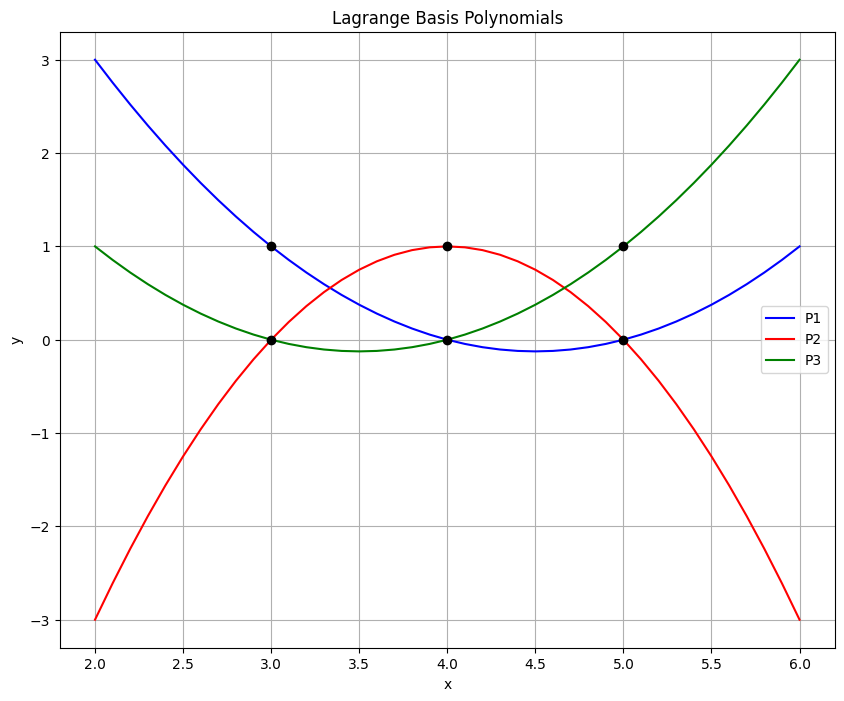

In [7]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [3, 4, 5]
y = [2, 4, 3]
P1_coeff = [10,-4.5,.5]
P2_coeff = [-15, 8,-1]
P3_coeff = [6,-3.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(2.0, 6.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Lagrange polynomial to verify that it goes through each of the data points.

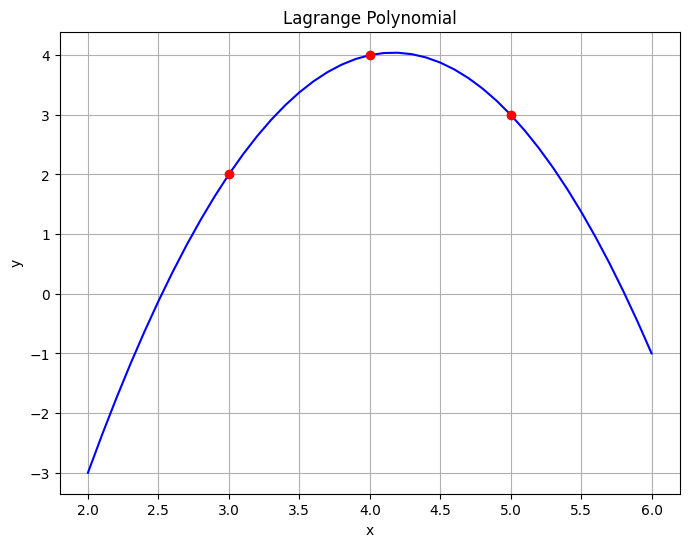

In [8]:
from scipy.interpolate import lagrange
f = lagrange(x, y)
fig = plt.figure(figsize = (8,6))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

17.4 Newton's Polynomial Interpolation
*   The general form of the an $n-1$ order Newton polynomial that goes through $n$ points: $f(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0)(x - x_1) + \dots + a_n (x - x_0)(x - x_1) \dots (x - x_n)$
*   Alternatively $f(x)=\sum_{i=0}^na_in_i(x)$, where $n_i(x)=\prod_{j=0}^{i-1}(x-x_j)$
*   The main feature of Newton's Polynomial is that the coefficients $a_j$ can be determined using $f(x_k,x_{k-1}, \dots ,x_1,x_0)=\frac{f[x_k, x_{k-1}, \dots , x_1]-f[x_{k-1}, \dots , x_0]}{x_k-x_0}$


Calculate the divided differences table for x = [-7, -3, -1, 5], y = [-4, 8, -2, 4]

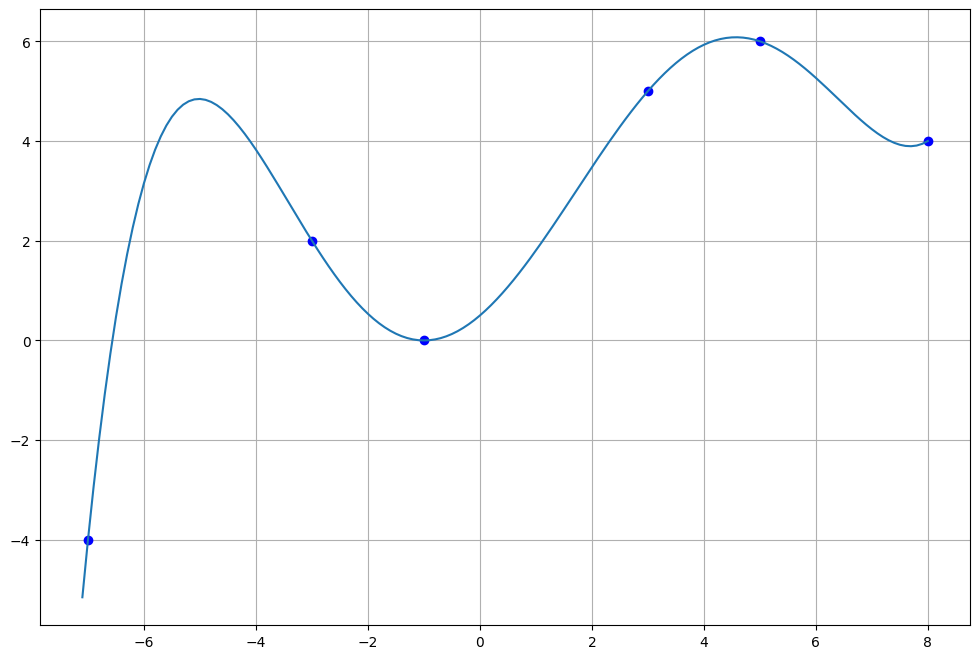

In [33]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([-7, -3, -1, 5, 8, 3])
y = np.array([-4, 2, 0, 6, 4, 5])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-7.1, 8.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.grid()